# Importing Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")

In [ ]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Regression Tree

We choose decision tree regression machine learning method for our wine quality data for two compelling reasons. Firstly, the dataset consists of numerical variables, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. Decision tree regression can effectively handle these continuous variables and capture the intricate relationships between them and the wine quality. By utilizing this method, we can gain insights into the factors that significantly influence the quality of the wine and understand their impact on the output.

In decision tree regression, we construct a tree-like model by recursively splitting the dataset based on the selected features and their thresholds. At each step, we identify the feature and threshold that lead to the most significant reduction in error. This process continues until a stopping criterion is met. Once the tree is built, we can make predictions by traversing the tree based on the feature values of the input data and following the decision rules at each node. The final prediction is determined by the target values in the leaf node reached by the sample. This approach allows us to capture complex relationships and interactions among the numerical features, enabling us to gain a deeper understanding of the factors that contribute to wine quality.

## Regression Tree

Import tools

In [ ]:
import numpy as np
import pandas as pd

Get data

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")
df.head

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value


Tree Class

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        val = np.mean(Y)
        return val

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        ''' function to predict a single data point '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

Split data

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

Fit model

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_10 <= 10.8 ? 0.12111057095662758
 left:X_1 <= 0.235 ? 0.06949565183785522
  left:X_5 <= 6.0 ? 0.018065268169624282
    left:X_3 <= 1.2 ? 0.3333333333333333
        left:4.833333333333333
        right:3.5
    right:X_1 <= 0.205 ? 0.018790628085026184
        left:6.065656565656566
        right:5.7804154302670625
  right:X_1 <= 0.3 ? 0.02126706268533063
    left:X_10 <= 9.9 ? 0.020211141379317787
        left:5.434523809523809
        right:5.727868852459016
    right:X_5 <= 8.0 ? 0.018149335727981775
        left:4.612903225806452
        right:5.281428571428571
 right:X_5 <= 11.0 ? 0.05933790265496508
  left:X_2 <= 0.18 ? 0.15534982896750416
    left:X_0 <= 4.7 ? 0.109375
        left:5.0
        right:4.0
    right:X_10 <= 11.7 ? 0.14632163471449178
        left:5.159090909090909
        right:5.925
  right:X_10 <= 11.7333333333333 ? 0.03802810163695325
    left:X_1 <= 0.47 ? 0.04724733513213908
        left:6.21996879875195
        right:4.25
    right:X_0 <= 8.1 ? 0.023816163988

Test model

In [ ]:
Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

0.7351488973453991

## 5-Fold Validation

In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)

scores = kfold_cross_validation(X, Y, regressor, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorert = scores

Fold 1 RMSE: 1.0445057530571853
Fold 2 RMSE: 1.0264349738789276
Fold 3 RMSE: 1.0060086770683332
Fold 4 RMSE: 1.0004500532601497
Fold 5 RMSE: 1.0119484535190115
Mean RMSE: 1.0178695821567214


# Polynomial Regression

## Testing using Linear Regression

Before diving into polynomial regression, it's essential to examine the linear regression plot. This plot provides valuable insights into the relationship between the input feature and the target variable. By visualizing the linear regression line, we can quickly determine if the relationship is predominantly linear or exhibits nonlinearity.

The linear regression plot allows us to assess if a straight line sufficiently represents the data or if there are deviations from linearity. If the plot shows a reasonably linear pattern with minimal deviations, a linear model may be suitable, and polynomial regression might not be necessary. On the other hand, if the plot displays clear nonlinearity, such as curvature or heteroscedasticity, it indicates that a linear model is inadequate. In such cases, polynomial regression can be considered as an alternative to capture the nonlinear behavior more accurately. In summary, the linear regression plot serves as a helpful diagnostic tool to guide the decision-making process before proceeding with polynomial regression

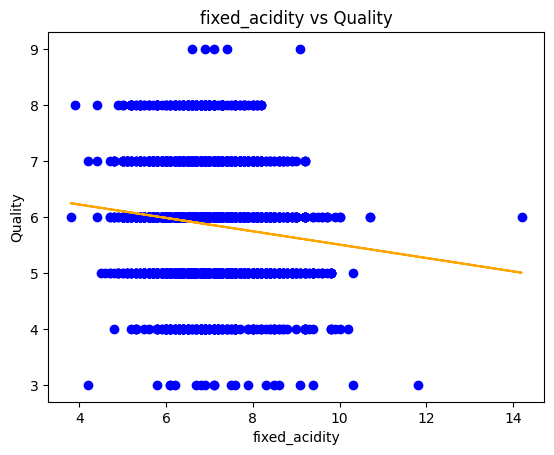

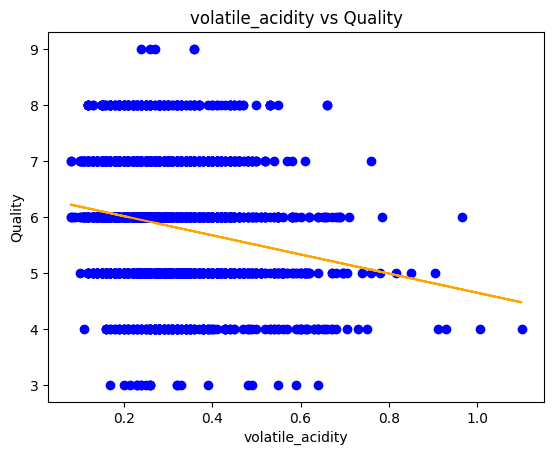

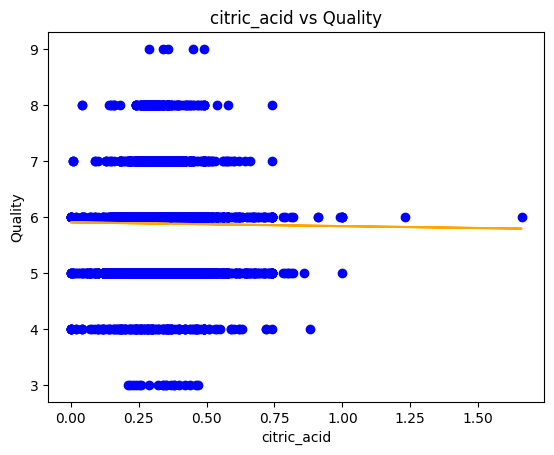

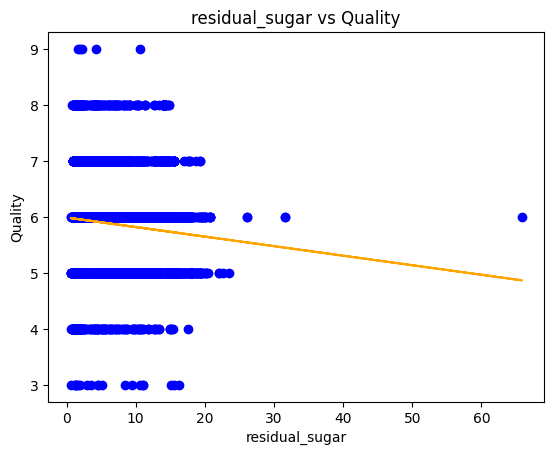

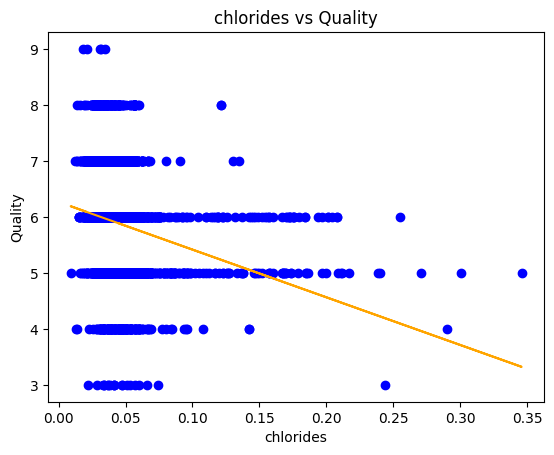

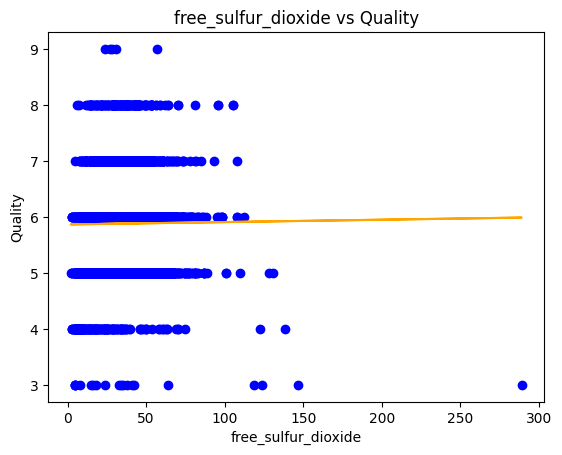

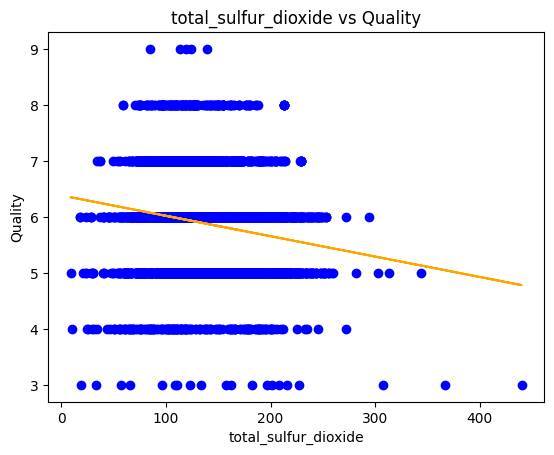

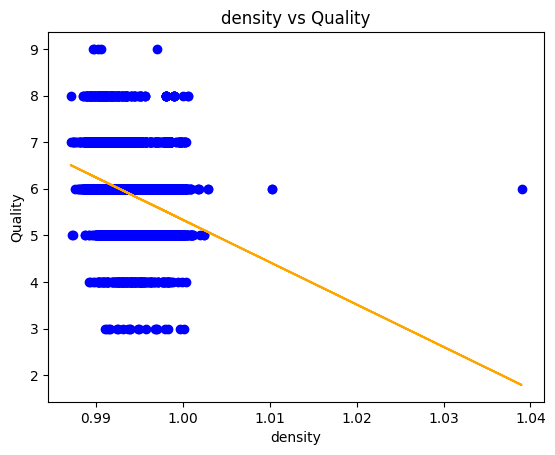

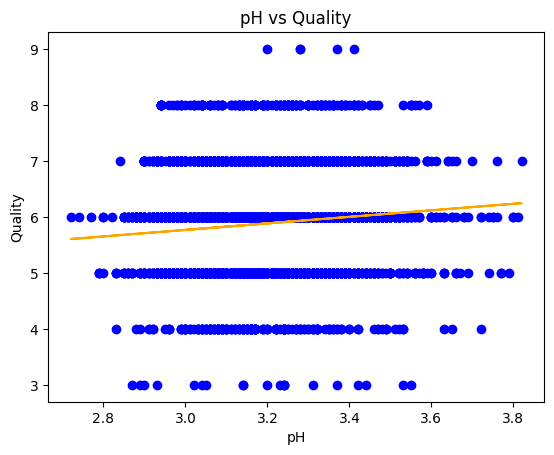

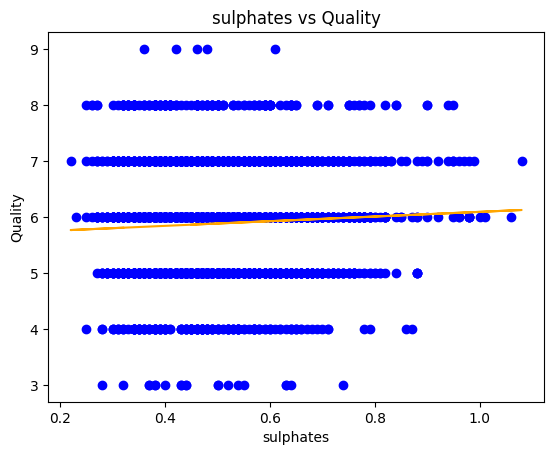

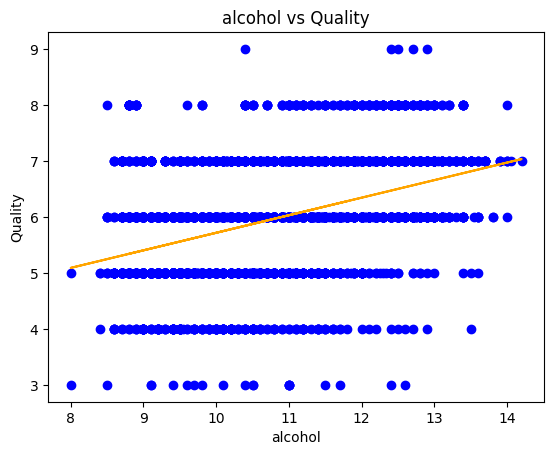

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the wine data from a CSV file using pandas
df = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")

# Extract the input features (X) and the target variable (Y) from the data
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
        'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = df['quality']

# Perform linear regression for each feature individually
for feature in X.columns:
    # Calculate the coefficients of the linear regression equation
    x_mean = np.mean(X[feature])
    y_mean = np.mean(Y)
    numerator = np.sum((X[feature] - x_mean) * (Y - y_mean))
    denominator = np.sum((X[feature] - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    # Prediction
    Y_pred = slope * X[feature] + intercept

    # Visualization
    plt.scatter(X[feature], Y, color='blue')
    plt.plot(X[feature], Y_pred, color='orange')
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.show()



After visualizing the plot of the linear regression, it is evident that there is no apparent linear relationship between the input feature and the target variable. The scattered data points do not align closely to a straight line, suggesting that a linear model is unlikely to capture the underlying pattern accurately. This observation indicates the need to explore alternative regression techniques, such as polynomial regression, to better represent the nonlinear nature of the relationship. By considering polynomial regression, we can potentially uncover more complex patterns and achieve a better fit between the data and the regression model.

## Polynomial Regression

In [ ]:
import numpy as np

def multivariate_polynomial_regression(X, Y, degree, lambda_):
    # Create polynomial feature matrix
    X_poly = np.ones((len(X), 1))
    for i in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X ** i), axis=1)

    # Add a column of ones for the intercept term
    X_poly = np.column_stack((np.ones(len(X_poly)), X_poly))

    # Compute weights using Ridge regression
    regularization_term = lambda_ * np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + regularization_term).dot(X_poly.T).dot(Y)

    return weights

# Load the dataset using pandas
df = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")

# Separate the independent and dependent variables
X = df.iloc[:, :-1].values  # Features, excluding the last column
Y = df.iloc[:, -1].values  # Target, last column

# Define the degree and regularization parameter
degree = 2
lambda_ = 0.01

weights = multivariate_polynomial_regression(X, Y, degree, lambda_)
print("Weights:", weights)


Weights: [ 1.37034892e+01  1.37034872e+01  4.36886747e-01 -3.03875090e+00
  9.83632211e-01  3.66678482e-02 -3.26259048e+00  1.25083330e-02
  6.57236775e-03 -2.72320487e+00 -7.53985841e-01  6.43844569e-01
 -6.13342427e-01 -3.11838217e-02  1.73412274e+00 -1.24338499e+00
 -1.76700090e-04  9.74781249e+00 -7.95525518e-05 -2.56384125e-05
 -1.87461756e+01  1.72919896e-01 -1.56994384e-01  4.23060327e-02]


In [ ]:
# Define the regression model
class PolynomialRegression:
    def __init__(self, degree, lambda_):
        self.degree = degree
        self.lambda_ = lambda_

    def fit(self, X, Y):
        self.weights = multivariate_polynomial_regression(X, Y, self.degree, self.lambda_)

    def predict(self, X):
        X_poly = np.ones((len(X), 1))
        for i in range(1, self.degree + 1):
            X_poly = np.concatenate((X_poly, X ** i), axis=1)

        X_poly = np.column_stack((np.ones(len(X_poly)), X_poly))
        return X_poly.dot(self.weights)

## 5-Fold Validation

In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = PolynomialRegression(degree, lambda_)

# Perform k-fold cross-validation
scores = kfold_cross_validation(X, Y, regressor, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorepr = scores

Fold 1 RMSE: 0.747845190930316
Fold 2 RMSE: 0.8539073577689166
Fold 3 RMSE: 0.7434526947679451
Fold 4 RMSE: 0.7397893601192278
Fold 5 RMSE: 0.7384944877383521
Mean RMSE: 0.7646978182649515


# XGBoost

XGBoost regression is a suitable choice for predicting our wine quality data due to its robustness and performance in handling numerical variables. With a dataset containing features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol, XGBoost can effectively capture the complex relationships between these numerical features and the wine quality outcome. Its ensemble learning approach combines multiple decision trees, allowing it to adaptively correct errors and improve predictive accuracy.

In XGBoost regression, the algorithm iteratively builds decision trees, with each subsequent tree focusing on correcting the mistakes made by the previous ones. The trees are constructed based on weighted samples, with higher weights assigned to misclassified or difficult-to-predict instances. This boosting process enables XGBoost to prioritize the most informative patterns in the data, enhancing its predictive power. Additionally, XGBoost incorporates regularization techniques such as L1 and L2 regularization to control model complexity and prevent overfitting. This ensures that the model generalizes well to unseen data and avoids memorizing the training set. Overall, XGBoost regression offers a powerful and effective solution for predicting wine quality by leveraging the strength of ensemble learning and regularization techniques

In [ ]:
import math
import numpy as np
import pandas as pd
from collections import defaultdict

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''

    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)

    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y),
                                     size=math.floor(self.subsample*len(y)),
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians,
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose:
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')

    def predict(self, X):
        return (self.base_prediction + self.learning_rate
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))

In [ ]:
class TreeBooster():

    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
      for i in range(self.c):
          self._find_better_split(i)
      if self.is_leaf:
          return
      if isinstance(self.X, pd.DataFrame):
          x = self.X.values[self.idxs, self.split_feature_idx]
      else:
          x = self.X[self.idxs, self.split_feature_idx]
      left_idx = np.nonzero(x <= self.threshold)[0]
      right_idx = np.nonzero(x > self.threshold)[0]
      if isinstance(self.X, pd.DataFrame):
          self.left = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[left_idx]
          )
          self.right = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[right_idx]
          )
      else:
          self.left = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[left_idx]
          )
          self.right = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[right_idx]
          )



    @property
    def is_leaf(self): return self.best_score_so_far == 0.

    def _find_better_split(self, feature_idx):
      x = self.X[self.idxs, feature_idx]
      g, h = self.g[self.idxs], self.h[self.idxs]
      sort_idx = np.argsort(x)
      sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
      sum_g, sum_h = g.sum(), h.sum()
      sum_g_right, sum_h_right = sum_g, sum_h
      sum_g_left, sum_h_left = 0., 0.

      for i in range(0, self.n - 1):
          g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
          sum_g_left += g_i
          sum_g_right -= g_i
          sum_h_left += h_i
          sum_h_right -= h_i
          if sum_h_left < self.min_child_weight or x_i == x_i_next:
              continue
          if sum_h_right < self.min_child_weight:
              break

          gain = 0.5 * (
              (sum_g_left**2 / (sum_h_left + self.reg_lambda)) +
              (sum_g_right**2 / (sum_h_right + self.reg_lambda)) -
              (sum_g**2 / (sum_h + self.reg_lambda))
          ) - self.gamma/2  # Eq(7) in the xgboost paper
          if gain > self.best_score_so_far:
              self.split_feature_idx = feature_idx
              self.best_score_so_far = gain
              self.threshold = (x_i + x_i_next) / 2

    def predict(self, X):
      if isinstance(X, pd.DataFrame):
          return np.array([self._predict_row(row) for i, row in X.iterrows()]).reshape(-1, 1)
      else:
          return np.array([self._predict_row(row) for row in X]).reshape(-1, 1)



    def _predict_row(self, row):
        if self.is_leaf:
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

In [ ]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

Disclaimer: below, we are using xgboost library only to compare results with our xgboost model.

In [ ]:
import xgboost as xgb

In [ ]:
params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 25,
    'base_score': 0.0,
    'tree_method': 'exact',
}
num_boost_round = 50

# train the from-scratch XGBoost model
model_scratch = XGBoostModel(params, random_seed=42)
model_scratch.fit(X_train, Y_train, SquaredErrorObjective(), num_boost_round)

# train the library XGBoost model
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
model_xgb = xgb.train(params, dtrain, num_boost_round)

# Make predictions on the test set using the from-scratch model
predictions_scratch = model_scratch.predict(X_test)

# Reshape predictions to match the shape of Y_test
predictions_scratch = predictions_scratch.reshape(-1, 1)

# Make predictions on the test set using the library XGBoost model
predictions_xgb = model_xgb.predict(dtest)

In [ ]:

print(f'scratch score: {SquaredErrorObjective().loss(Y_test, predictions_scratch)}')
print(f'xgboost score: {SquaredErrorObjective().loss(Y_test, predictions_xgb)}')

scratch score: 0.4344137056019488
xgboost score: 1.0878225987212717


In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, objective, num_boost_round, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train, objective, num_boost_round)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = XGBoostModel(params, random_seed=42)

# Specify the objective and number of boosting rounds
objective = SquaredErrorObjective()
num_boost_round = 50

# Perform k-fold cross-validation
scores = kfold_cross_validation(X, Y, regressor, objective, num_boost_round, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorexgb = scores

Fold 1 RMSE: 0.7087851230152433
Fold 2 RMSE: 0.6722107108810548
Fold 3 RMSE: 0.679318719300437
Fold 4 RMSE: 0.6548986450700914
Fold 5 RMSE: 0.6943141310626028
Mean RMSE: 0.6819054658658859


# GAN (Generative Adversarial Network) for Data Augmentation

In the machine learning work, frequently we meet the situation the data are not enough for training models and we need more artificial data. GANs (Generative Adversarial Networks) is a deep learning architecture introduced by Ian Goodfellow etc. in 2014(1). GANs could generate synthetic data from scratch and comprise of two components: generator and discriminator. The generator is used to produce fake data from input random noise; The discriminator is used to classify the samples are real or fake (produced by generator). The performance of the discriminator is used to update and optimize the generator and discriminator.

### Base Accuracy for Real Dataset

First of all, we load the data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")

In [ ]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Then, we input all the requested python modules first, read the csv file to pandas as Dataframe and explore the dataset roughly.

The white wine dataset includes 12 columns: fixed_acidity, volatile_acidity citric_acid, residual_sugar, chlorides, free_sulfur_dioxide total_sulfur_dioxide, density, pH, sulphates, alcohol, and quality. The quality column will be the label.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
data = pd.read_csv("/content/drive/My Drive/ProjectAI/winequality-white.csv")
print (data.shape)
print (data.tail())
print (data.columns)

(4898, 12)
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2 

We will use all columns except quality column as features to train the model. Quality column will be used as the label of the model.

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
label = ['quality']
X = data[features]
y = data[label]

The real dataset is split into train and test dataset. The random forest classifier model is trained and evaluate the accuracy.

In [ ]:
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)
y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy: 0.6625641025641026
Base classification report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.89      0.12      0.21        69
           5       0.67      0.72      0.69       613
           6       0.66      0.74      0.69       894
           7       0.66      0.54      0.59       315
           8       0.93      0.29      0.44        49
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1950
   macro avg       0.54      0.34      0.37      1950
weighted avg       0.67      0.66      0.65      1950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Generate Synthetic Data

From this section we will start to generate fake data using GANs. First step, we define a generate_latent_points function, it will create random noise in the latent space and be reshaped to the dimensions for matching the input of generator model.

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

We define the generate_fake_samples function to produce fake data. The input of the generator will be the created latent points (random noise). The generator will predict the input random noise and output a numpy array. Because it is the fake data, the label will be 0.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))

    return X, y

We will define another function to generate real samples, it will randomly select samples from the real dataset. The label for the real data sample is 1.

In [ ]:
# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = data.sample(n)
    y = np.ones((n, 1))
    return X, y

We will create a simple sequential model as generator with Keras module. The input dimension will be the same as the dimension of input samples. The kernel will be initialized by ‘ he_uniform ’. The model will have 3 layers, two layers will be activated by ‘relu’ function. The output layer will be activated by ‘linear’ function and the dimension of the output layer is the same as the dimension of the dataset (12 columns).

In [ ]:
def define_generator(latent_dim, n_outputs=12):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

We could check the information of the generator model by inputting some parameter values.

In [ ]:
generator1 = define_generator(10, 12)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 12)                372       
                                                                 
Total params: 1,017
Trainable params: 1,017
Non-trainable params: 0
_________________________________________________________________


After we have defined the generator, we will define the discriminator next step. The discriminator is also a simple sequential model including 3 dense layers. The first two layers are activated by ‘relu’ function, the output layer is activated by ‘sigmoid’ function because it will discriminate the input samples are real (True) or fake (False).

In [ ]:
def define_discriminator(n_inputs=12):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

We could check the information of the discriminator model by inputting some parameter values.

In [ ]:
discriminator1 = define_discriminator(12)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                325       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,676
Trainable params: 1,676
Non-trainable params: 0
_________________________________________________________________


We will define the Gan model after we have define the generator and discriminator models. It is also a sequential model and combine generator with discriminator.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

We will make a plot_history function to visualize the final generator and discriminator loss in the plot.

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

Finally we will train the generator and discriminator. For each epoch, we will combine half batch of real data and half batch of fake data, then calculate the average loss. The combined model will be updated based on train_on_batch function. The trained generator will be saved for further use.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=200):
    # determine half the size of one batch, for updating the  discriminator
    half_batch = int(n_batch / 2)
    d_history = []
    g_history = []
    # manually enumerate epochs
    for epoch in range(n_epochs):

    # prepare real samples
      x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
      x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
      d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
      d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    # prepare points in latent space as input for the generator
      x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
    # update the generator via the discriminator's error
      g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
      print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
      d_history.append(d_loss)
      g_history.append(g_loss_fake)

    plot_history(d_history, g_history)
    g_model.save('trained_generated_model.h5')

We input latent_dim value is 10 to start the training.
The Loss of generator and discriminator changes are plotted as followed: blue-loss of discriminator; orange-loss of generator

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 10ms/step
>7501, d1=0.433, d2=0.306 d=0.369 g=1.912
2/2 [==============================] - 0s 5ms/step
>7502, d1=0.404, d2=0.266 d=0.335 g=1.940
2/2 [==============================] - 0s 10ms/step
>7503, d1=0.358, d2=0.295 d=0.327 g=1.729
2/2 [==============================] - 0s 5ms/step
>7504, d1=0.253, d2=0.296 d=0.275 g=1.640
2/2 [==============================] - 0s 7ms/step
>7505, d1=0.319, d2=0.308 d=0.314 g=1.554
2/2 [==============================] - 0s 5ms/step
>7506, d1=0.357, d2=0.401 d=0.379 g=1.545
2/2 [==============================] - 0s 9ms/step
>7507, d1=0.487, d2=0.433 d=0.460 g=1.464
2/2 [==============================] - 0s 4ms/step
>7508, d1=0.511, d2=0.471 d=0.491 g=1.401
2/2 [==============================] - 0s 5ms/step
>7509, d1=0.521, d2=0.546 d=0.533 g=1.450
2/2 [==============================] - 0s 8ms/step
>7510, d1=0.747, d2=0.457 d=0.602 g=1.392
2/2 [============

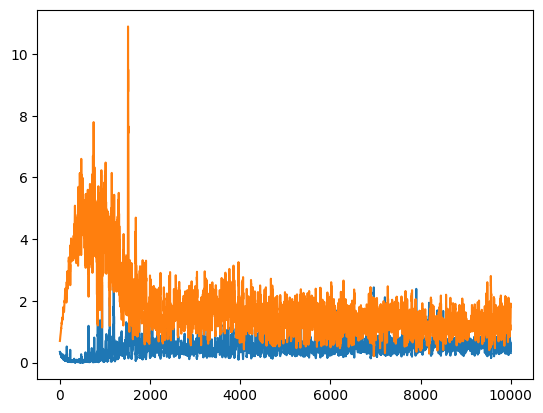

In [ ]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

### Evaluate the Quality of Generated Fake Data With Model

In [ ]:
from keras.models import load_model
model = load_model('/content/trained_generated_model.h5')

In [ ]:
latent_points = generate_latent_points(10, 750)
X = model.predict(latent_points)
data_fake = pd.DataFrame(data=X,  columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
data_fake.head()

24/24 [==============================] - 0s 1ms/step


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,2.268738,-0.109172,-0.063845,3.605505,0.111814,6.488409,30.860252,0.280011,0.848719,0.109125,3.617279,2.384382
1,11.392189,2.097454,1.828150,-6.454352,1.265101,9.522752,276.390564,1.283533,5.691014,0.745346,20.339220,9.970375
2,6.586312,0.557399,0.547168,2.865549,0.456446,53.010303,198.138260,1.728366,4.063791,0.505464,16.076000,9.816957
3,3.244263,0.438703,0.295238,-0.728833,0.403645,9.094485,81.841606,0.409706,1.546832,0.204668,6.102009,3.055580
4,2.540032,0.002525,0.002522,2.771387,0.197936,15.155529,54.875725,0.467384,1.189906,0.143158,5.024840,3.073868


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
quality_mean = data_fake.quality.mean()
data_fake['quality'] = data_fake['quality'] > quality_mean
data_fake["quality"] = data_fake["quality"].astype(int)

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
label = ['quality']
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

We will train the random forest classifier model with the fake data and get the accuracy. It will be used to compare with the accuracy of the base model accuracy.

In [ ]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)
y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))

<ipython-input-163-540994085c86>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_fake.fit(X_fake_train,y_fake_train)


Accuracy of fake data model: 0.9955555555555555
Classification report of fake data model:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.99      0.99        82

    accuracy                           1.00       225
   macro avg       1.00      0.99      1.00       225
weighted avg       1.00      1.00      1.00       225



The accuracy of the new trained model with generated fake data is around 1.00

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/ProjectAI")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

# Feature Selection

We used backward elimination as a feature selection method for our wine quality dataset. This technique helps us identify the most important features that significantly contribute to predicting wine quality. By removing features with high p-values, which indicate low significance, we aim to create a more concise model that retains only the most influential predictors. Backward elimination is particularly suitable for our dataset as it allows us to systematically assess each feature's importance and include only those that truly explain the variation in wine quality.

The backward elimination process involves loading the dataset, separating features and the target variable, and adding an intercept term. We set a significance level (alpha) to guide the selection process. Starting with all features included, we fit a regression model and compute the p-values. The feature with the highest p-value is evaluated against the significance level. If it exceeds alpha, indicating low significance, we remove the feature. We repeat this process iteratively until all remaining features have p-values below the significance level. The result is a set of selected features that are most significant in predicting wine quality, helping us build an efficient and interpretable model.

In [ ]:
import pandas as pd
# Load the wine data
dfgan = pd.read_csv("/content/drive/My Drive/ProjectAI/aftergan.csv")
print(dfgan.shape[0])  # Prints the number of rows in the DataFrame
dfgan = dfgan.iloc[:, 1:]  # Drops the first column
dfgan

6497


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
import numpy as np
import statsmodels.api as sm



# Separate features (X) and target variable (y)
X = dfgan.iloc[:, :-1].values
y = dfgan.iloc[:, -1].values

# Add a column of ones to represent the intercept term
X = np.append(arr=np.ones((X.shape[0], 1)), values=X, axis=1)

# Set the significance level
alpha = 0.05

# Perform backward elimination
num_features = X.shape[1]
included_features = list(range(num_features))

while True:
    regressor_ols = sm.OLS(y, X[:, included_features]).fit()
    p_values = regressor_ols.pvalues

    max_p_value = max(p_values)
    max_p_value_index = np.argmax(p_values)

    if max_p_value > alpha:
        included_features.pop(max_p_value_index)
    else:
        break

# Print the selected features
selected_features = included_features[1:]  # Exclude the intercept term

# Create a new DataFrame with selected features
dfganselected = dfgan.iloc[:, selected_features]

# Print the selected features DataFrame
dfganselected
dfganselected.to_csv("/content/drive/My Drive/ProjectAI/dfganselected.csv", index=False)

# Regression Tree after GAN and Feature Selection

## Regression Tree

Import tools

In [ ]:
import numpy as np
import pandas as pd

Get data

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ProjectAI/dfganselected.csv")
df.head

<bound method NDFrame.head of       volatile_acidity  citric_acid  chlorides  total_sulfur_dioxide  density  \
0                 0.70         0.00      0.076                  34.0  0.99780   
1                 0.88         0.00      0.098                  67.0  0.99680   
2                 0.76         0.04      0.092                  54.0  0.99700   
3                 0.28         0.56      0.075                  60.0  0.99800   
4                 0.70         0.00      0.076                  34.0  0.99780   
...                ...          ...        ...                   ...      ...   
6492              0.21         0.29      0.039                  92.0  0.99114   
6493              0.32         0.36      0.047                 168.0  0.99490   
6494              0.24         0.19      0.041                 111.0  0.99254   
6495              0.29         0.30      0.022                 110.0  0.98869   
6496              0.21         0.38      0.020                  98.0  0.98941  

Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value


Tree Class

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        val = np.mean(Y)
        return val

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        ''' function to predict a single data point '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

Split data

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

Fit model

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_7 <= 10.6 ? 0.11844203836846845
 left:X_0 <= 0.235 ? 0.06007126159157916
  left:X_0 <= 0.205 ? 0.02433290078083883
    left:X_4 <= 0.9979 ? 0.07052753512989951
        left:5.917241379310345
        right:6.592233009708738
    right:X_7 <= 8.0 ? 0.02277415660308285
        left:3.0
        right:5.733128834355829
  right:X_7 <= 9.8 ? 0.015096077286658516
    left:X_0 <= 0.37 ? 0.012505707302939428
        left:5.392108508014797
        right:5.1674140508221225
    right:X_0 <= 0.615 ? 0.024254848939673557
        left:5.610015174506828
        right:5.144329896907217
 right:X_7 <= 11.6 ? 0.05947926544387605
  left:X_0 <= 0.44 ? 0.049530455651974004
    left:X_1 <= 0.23 ? 0.012279857828661589
        left:5.688524590163935
        right:6.134570765661253
    right:X_0 <= 0.91 ? 0.14342000772664842
        left:5.604395604395604
        right:3.9
  right:X_3 <= 80.0 ? 0.017409409608126425
    left:X_6 <= 0.62 ? 0.10864135520115237
        left:5.993464052287582
        right:6.66071428

Test model

In [ ]:
Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

0.7680304074839271

## 5-Fold Validation

In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)

scores = kfold_cross_validation(X, Y, regressor, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorert_gan = scores

Fold 1 RMSE: 0.9781198284367425
Fold 2 RMSE: 1.0062835966787282
Fold 3 RMSE: 1.0184596541528284
Fold 4 RMSE: 0.9828093948908787
Fold 5 RMSE: 1.005282457136615
Mean RMSE: 0.9981909862591586


# Polynomial Regression after GAN and Feature Selection

## Testing using Linear Regression

Before diving into polynomial regression, it's essential to examine the linear regression plot. This plot provides valuable insights into the relationship between the input feature and the target variable. By visualizing the linear regression line, we can quickly determine if the relationship is predominantly linear or exhibits nonlinearity.

The linear regression plot allows us to assess if a straight line sufficiently represents the data or if there are deviations from linearity. If the plot shows a reasonably linear pattern with minimal deviations, a linear model may be suitable, and polynomial regression might not be necessary. On the other hand, if the plot displays clear nonlinearity, such as curvature or heteroscedasticity, it indicates that a linear model is inadequate. In such cases, polynomial regression can be considered as an alternative to capture the nonlinear behavior more accurately. In summary, the linear regression plot serves as a helpful diagnostic tool to guide the decision-making process before proceeding with polynomial regression

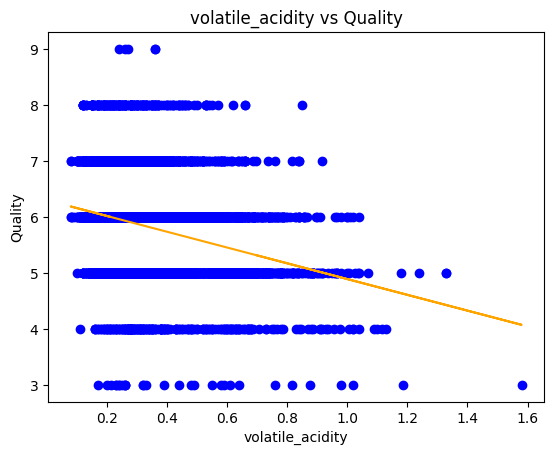

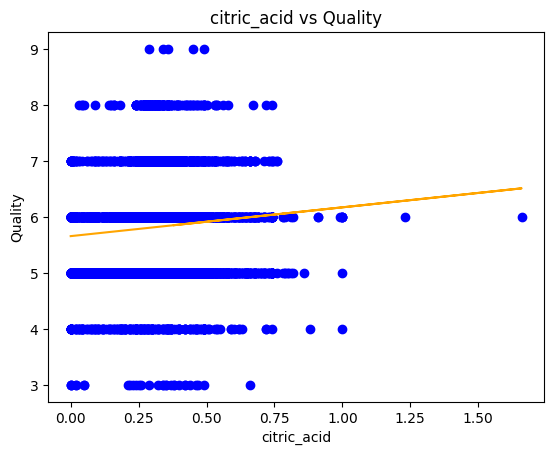

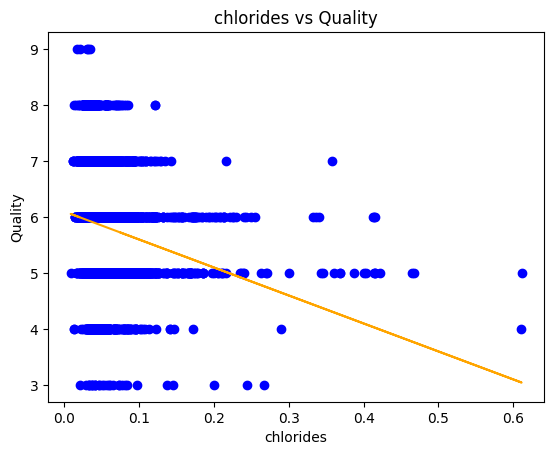

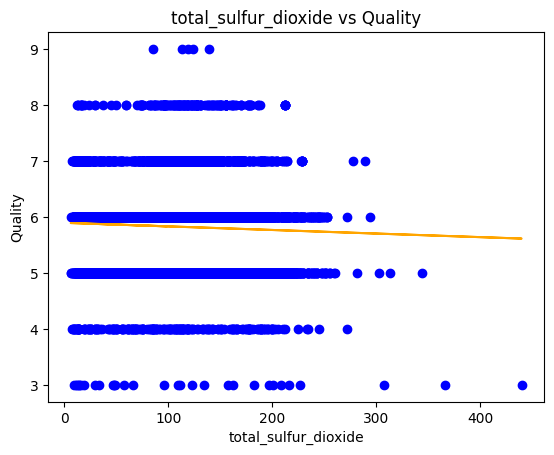

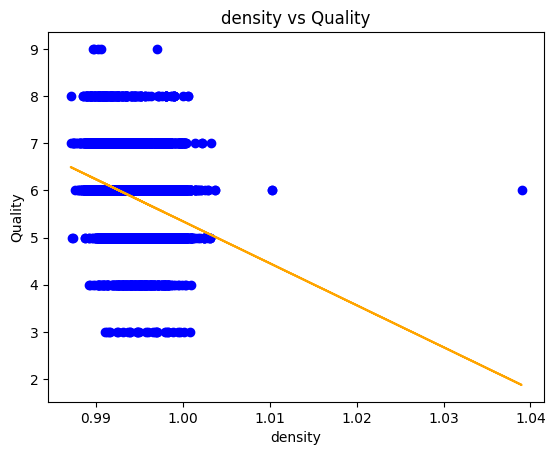

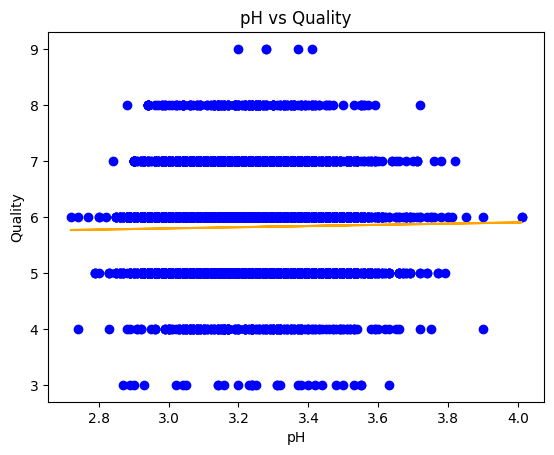

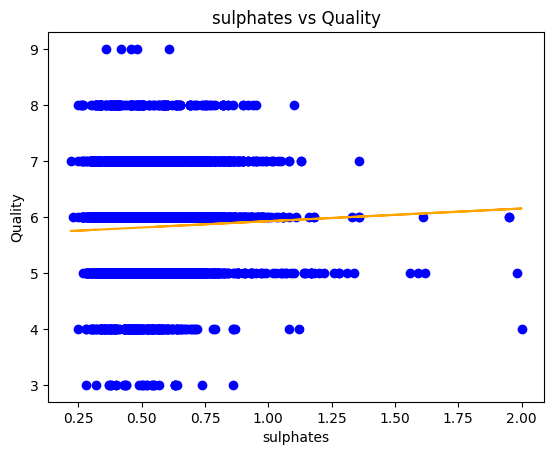

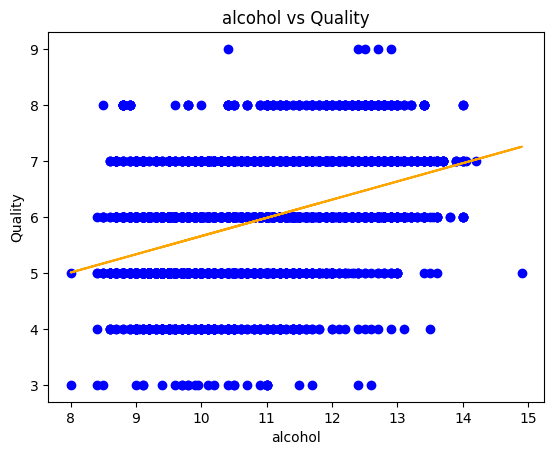

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the wine data from a CSV file using pandas
df = pd.read_csv("/content/drive/My Drive/ProjectAI/dfganselected.csv")

# Extract the input features (X) and the target variable (Y) from the data
X = df[['volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = df['quality']

# Perform linear regression for each feature individually
for feature in X.columns:
    # Calculate the coefficients of the linear regression equation
    x_mean = np.mean(X[feature])
    y_mean = np.mean(Y)
    numerator = np.sum((X[feature] - x_mean) * (Y - y_mean))
    denominator = np.sum((X[feature] - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    # Prediction
    Y_pred = slope * X[feature] + intercept

    # Visualization
    plt.scatter(X[feature], Y, color='blue')
    plt.plot(X[feature], Y_pred, color='orange')
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.show()



After visualizing the plot of the linear regression, it is evident that there is no apparent linear relationship between the input feature and the target variable. The scattered data points do not align closely to a straight line, suggesting that a linear model is unlikely to capture the underlying pattern accurately. This observation indicates the need to explore alternative regression techniques, such as polynomial regression, to better represent the nonlinear nature of the relationship. By considering polynomial regression, we can potentially uncover more complex patterns and achieve a better fit between the data and the regression model.

## Polynomial Regression

In [ ]:
import numpy as np

def multivariate_polynomial_regression(X, Y, degree, lambda_):
    # Create polynomial feature matrix
    X_poly = np.ones((len(X), 1))
    for i in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X ** i), axis=1)

    # Add a column of ones for the intercept term
    X_poly = np.column_stack((np.ones(len(X_poly)), X_poly))

    # Compute weights using Ridge regression
    regularization_term = lambda_ * np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + regularization_term).dot(X_poly.T).dot(Y)

    return weights

# Load the dataset using pandas
df = pd.read_csv("/content/drive/My Drive/ProjectAI/dfganselected.csv")

# Separate the independent and dependent variables
X = df.iloc[:, :-1].values  # Features, excluding the last column
Y = df.iloc[:, -1].values  # Target, last column

# Define the degree and regularization parameter
degree = 2
lambda_ = 0.01

weights = multivariate_polynomial_regression(X, Y, degree, lambda_)
print("Weights:", weights)


Weights: [-7.74797837e+00 -7.74797522e+00 -2.34381619e+00  2.00214686e-01
 -1.02201735e+00  2.05907263e-03  2.87647538e+00  4.03677290e+00
  1.09764322e+00 -5.63919229e-01  8.65082063e-01 -5.09804579e-01
  7.61640302e-01 -1.06462143e-05  1.33421389e+01 -6.10306016e-01
 -3.52734684e-01  4.21704983e-02]


In [ ]:
# Define the regression model
class PolynomialRegression:
    def __init__(self, degree, lambda_):
        self.degree = degree
        self.lambda_ = lambda_

    def fit(self, X, Y):
        self.weights = multivariate_polynomial_regression(X, Y, self.degree, self.lambda_)

    def predict(self, X):
        X_poly = np.ones((len(X), 1))
        for i in range(1, self.degree + 1):
            X_poly = np.concatenate((X_poly, X ** i), axis=1)

        X_poly = np.column_stack((np.ones(len(X_poly)), X_poly))
        return X_poly.dot(self.weights)

## 5-Fold Validation

In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = PolynomialRegression(degree, lambda_)

# Perform k-fold cross-validation
scores = kfold_cross_validation(X, Y, regressor, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorepr_gan = scores

Fold 1 RMSE: 0.748090031588995
Fold 2 RMSE: 0.7458823600187287
Fold 3 RMSE: 0.7326980850824278
Fold 4 RMSE: 0.7301724520949894
Fold 5 RMSE: 0.7437284103898447
Mean RMSE: 0.7401142678349972


# XGBoost after GAN and Feature Selection

In [ ]:
import math
import numpy as np
import pandas as pd
from collections import defaultdict

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ProjectAI/dfganselected.csv")

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''

    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)

    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y),
                                     size=math.floor(self.subsample*len(y)),
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians,
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose:
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')

    def predict(self, X):
        return (self.base_prediction + self.learning_rate
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))

In [ ]:
class TreeBooster():

    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
      for i in range(self.c):
          self._find_better_split(i)
      if self.is_leaf:
          return
      if isinstance(self.X, pd.DataFrame):
          x = self.X.values[self.idxs, self.split_feature_idx]
      else:
          x = self.X[self.idxs, self.split_feature_idx]
      left_idx = np.nonzero(x <= self.threshold)[0]
      right_idx = np.nonzero(x > self.threshold)[0]
      if isinstance(self.X, pd.DataFrame):
          self.left = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[left_idx]
          )
          self.right = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[right_idx]
          )
      else:
          self.left = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[left_idx]
          )
          self.right = TreeBooster(
              self.X, self.g, self.h, self.params,
              self.max_depth - 1, self.idxs[right_idx]
          )



    @property
    def is_leaf(self): return self.best_score_so_far == 0.

    def _find_better_split(self, feature_idx):
      x = self.X[self.idxs, feature_idx]
      g, h = self.g[self.idxs], self.h[self.idxs]
      sort_idx = np.argsort(x)
      sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
      sum_g, sum_h = g.sum(), h.sum()
      sum_g_right, sum_h_right = sum_g, sum_h
      sum_g_left, sum_h_left = 0., 0.

      for i in range(0, self.n - 1):
          g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
          sum_g_left += g_i
          sum_g_right -= g_i
          sum_h_left += h_i
          sum_h_right -= h_i
          if sum_h_left < self.min_child_weight or x_i == x_i_next:
              continue
          if sum_h_right < self.min_child_weight:
              break

          gain = 0.5 * (
              (sum_g_left**2 / (sum_h_left + self.reg_lambda)) +
              (sum_g_right**2 / (sum_h_right + self.reg_lambda)) -
              (sum_g**2 / (sum_h + self.reg_lambda))
          ) - self.gamma/2  # Eq(7) in the xgboost paper
          if gain > self.best_score_so_far:
              self.split_feature_idx = feature_idx
              self.best_score_so_far = gain
              self.threshold = (x_i + x_i_next) / 2

    def predict(self, X):
      if isinstance(X, pd.DataFrame):
          return np.array([self._predict_row(row) for i, row in X.iterrows()]).reshape(-1, 1)
      else:
          return np.array([self._predict_row(row) for row in X]).reshape(-1, 1)



    def _predict_row(self, row):
        if self.is_leaf:
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

In [ ]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

In [ ]:
import xgboost as xgb

In [ ]:
params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 25,
    'base_score': 0.0,
    'tree_method': 'exact',
}
num_boost_round = 50

# train the from-scratch XGBoost model
model_scratch = XGBoostModel(params, random_seed=42)
model_scratch.fit(X_train, Y_train, SquaredErrorObjective(), num_boost_round)

# train the library XGBoost model
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
model_xgb = xgb.train(params, dtrain, num_boost_round)

# Make predictions on the test set using the from-scratch model
predictions_scratch = model_scratch.predict(X_test)

# Reshape predictions to match the shape of Y_test
predictions_scratch = predictions_scratch.reshape(-1, 1)

# Make predictions on the test set using the library XGBoost model
predictions_xgb = model_xgb.predict(dtest)

In [ ]:

print(f'scratch score: {SquaredErrorObjective().loss(Y_test, predictions_scratch)}')
print(f'xgboost score: {SquaredErrorObjective().loss(Y_test, predictions_xgb)}')

scratch score: 0.5131289532765211
xgboost score: 1.0584404065148751


In [ ]:
import numpy as np

def kfold_cross_validation(X, Y, model, objective, num_boost_round, k=5):
    num_samples = len(X)
    fold_size = num_samples // k

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    scores = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else num_samples

        train_indices = np.concatenate((indices[:start], indices[end:]))
        test_indices = indices[start:end]

        X_train, Y_train = X[train_indices], Y[train_indices]
        X_test, Y_test = X[test_indices], Y[test_indices]

        model.fit(X_train, Y_train, objective, num_boost_round)
        Y_pred = model.predict(X_test)

        score = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
        scores.append(score)

        print("Fold", i+1, "RMSE:", score)

    return scores

In [ ]:
regressor = XGBoostModel(params, random_seed=42)

# Specify the objective and number of boosting rounds
objective = SquaredErrorObjective()
num_boost_round = 50

# Perform k-fold cross-validation
scores = kfold_cross_validation(X, Y, regressor, objective, num_boost_round, k=5)
mean_rmse = np.mean(scores)
print("Mean RMSE:", mean_rmse)
scorexgb_gan = scores

Fold 1 RMSE: 0.6975594971434997
Fold 2 RMSE: 0.6934809154873867
Fold 3 RMSE: 0.7109489266824995
Fold 4 RMSE: 0.6874569375750893
Fold 5 RMSE: 0.6596971425723545
Mean RMSE: 0.6898286838921659


In [ ]:
print(scorert)
print(scorert_gan)
print(scorepr)
print(scorepr_gan)
print(scorexgb)
print(scorexgb_gan)

[1.0445057530571853, 1.0264349738789276, 1.0060086770683332, 1.0004500532601497, 1.0119484535190115]
[0.9781198284367425, 1.0062835966787282, 1.0184596541528284, 0.9828093948908787, 1.005282457136615]
[0.747845190930316, 0.8539073577689166, 0.7434526947679451, 0.7397893601192278, 0.7384944877383521]
[0.748090031588995, 0.7458823600187287, 0.7326980850824278, 0.7301724520949894, 0.7437284103898447]
[0.7087851230152433, 0.6722107108810548, 0.679318719300437, 0.6548986450700914, 0.6943141310626028]
[0.6975594971434997, 0.6934809154873867, 0.7109489266824995, 0.6874569375750893, 0.6596971425723545]


In [ ]:
print(scorert)
print(scorepr)
print(scorexgb)
print(scorert_gan)
print(scorepr_gan)
print(scorexgb_gan)

[1.0445057530571853, 1.0264349738789276, 1.0060086770683332, 1.0004500532601497, 1.0119484535190115]
[0.747845190930316, 0.8539073577689166, 0.7434526947679451, 0.7397893601192278, 0.7384944877383521]
[0.7087851230152433, 0.6722107108810548, 0.679318719300437, 0.6548986450700914, 0.6943141310626028]
[0.9781198284367425, 1.0062835966787282, 1.0184596541528284, 0.9828093948908787, 1.005282457136615]
[0.748090031588995, 0.7458823600187287, 0.7326980850824278, 0.7301724520949894, 0.7437284103898447]
[0.6975594971434997, 0.6934809154873867, 0.7109489266824995, 0.6874569375750893, 0.6596971425723545]


# Statistical Analysis

## Comparing Classifiers Before and After Data Augmentation + Feature Selection Using Paired t-tests

In this first part of our statistical analysis, we are using paired t-tests to compare the performance of the classifiers before and after data augmentation and feature selection. A paired t-test is appropriate when we have two sets of measurements that are related or paired in some way, such as the same set of samples being evaluated by the classifiers at different stages.

By using paired t-tests, we can account for the inherent variability in the data and focus on the differences within each pair of measurements. This allows us to assess whether there is a statistically significant difference in accuracy between the classifiers before and after the application of data augmentation and feature selection.

The paired t-test calculates the t-value, which represents the standardized difference between the two sets of measurements, and the corresponding p-value, which indicates the probability of observing the observed difference by chance alone. By comparing the p-value to a predefined significance level (e.g., 0.05), we can determine whether the observed difference is statistically significant, providing insights into the effectiveness of the applied techniques in improving classifier performance.

In our statistical analysis, the null hypothesis (H0) states that there is no significant difference in accuracy between the classifiers before and after data augmentation and feature selection. This means that any observed variations in performance are attributed to random chance or fluctuations. The alternative hypothesis (H1) proposes that there is indeed a significant difference in accuracy between the classifiers before and after applying data augmentation and feature selection techniques. We are using a significance value of 0.05

In [ ]:
# Calculate the mean of a list of scores
def calculate_mean(scores):
    return sum(scores) / len(scores)

# Calculate the standard deviation of a list of scores
def calculate_std(scores, mean):
    squared_diff = [(x - mean) ** 2 for x in scores]
    variance = sum(squared_diff) / (len(scores) - 1)
    return variance ** 0.5

# Calculate the t-value and p-value for a paired t-test
def paired_t_test(scores_before, scores_after):
    n = len(scores_before)
    diff = [scores_after[i] - scores_before[i] for i in range(n)]

    mean_diff = calculate_mean(diff)
    std_diff = calculate_std(diff, mean_diff)

    t_value = mean_diff / (std_diff / (n ** 0.5))

    # Calculate the degrees of freedom
    df = n - 1

    # Calculate the p-value based on the t-distribution
    p_value = 2 * (1 - calculate_t_cdf(abs(t_value), df))

    return t_value, p_value

# Calculate the cumulative distribution function (CDF) of the t-distribution
def calculate_t_cdf(t_value, df):
    step = 0.0001
    area = 0.0
    t = -10.0

    while t < t_value:
        area += step * calculate_t_pdf(t, df)
        t += step

    return area

# Calculate the probability density function (PDF) of the t-distribution
def calculate_t_pdf(t, df):
    numerator = math.gamma((df + 1) / 2)
    denominator = math.sqrt(df * math.pi) * math.gamma(df / 2)
    coefficient = numerator / denominator
    exponent = -((df + 1) / 2) * math.log(1 + (t ** 2) / df)
    return coefficient * math.exp(exponent)

1. Comparing regression tree scores before and after data augmentation + feature selection

In [ ]:
t_value, p_value = paired_t_test(scorert, scorert_gan)

print("Paired t-test results:")
print(f"T-value: {t_value}")
print(f"P-value: {p_value}")

Paired t-test results:
T-value: -1.5120417470437941
P-value: 0.20562190852836593


For the comparison between the regression tree method before and after data augmentation and feature selection, the paired t-test yielded a t-value of -1.512 and a p-value of 0.205. Since the p-value is greater than the significance level of 0.05, we do not have enough evidence to reject the null hypothesis. Therefore, there is no significant difference in accuracy between the regression tree method before and after applying data augmentation and feature selection.

2. Comparing polynomial regression scores before and after data augmentation + feature selection

In [ ]:
t_value, p_value = paired_t_test(scorepr, scorepr_gan)

print("Paired t-test results:")
print(f"T-value: {t_value}")
print(f"P-value: {p_value}")

Paired t-test results:
T-value: -1.1664705077065374
P-value: 0.3087965044379759


 In the case of the polynomial regression method, the paired t-test resulted in a t-value of -1.166 and a p-value of 0.308. With the p-value being greater than the significance level, we fail to reject the null hypothesis. This implies that there is no statistically significant difference in accuracy between the polynomial regression method before and after data augmentation and feature selection.

3. Comparing XGBoost scores before and after data augmentation + feature selection

In [ ]:
t_value, p_value = paired_t_test(scorexgb, scorexgb_gan)

print("Paired t-test results:")
print(f"T-value: {t_value}")
print(f"P-value: {p_value}")

Paired t-test results:
T-value: 0.5969469978322693
P-value: 0.5832492281405293


Finally, for the comparison of the XGBoost method before and after data augmentation and feature selection, the paired t-test showed a t-value of 0.597 and a p-value of 0.5832. As the p-value is higher than the significance level, we cannot reject the null hypothesis. Hence, there is no significant difference in accuracy observed between the xgboost method before and after applying data augmentation and feature selection.

## Comparing Classifiers After Data Augmentation + Feature Selection Using One-Way Anova

In order to compare the accuracy of all three classifiers (regression tree, polynomial regression, and xgboost) after data augmentation and feature selection, we are utilizing a statistical test called one-way ANOVA (Analysis of Variance). One-way ANOVA is suitable when we have multiple groups and want to determine if there are significant differences among the means of those groups.

By applying one-way ANOVA to our data, we can assess whether there is a significant variation in accuracy across the three classifiers. The analysis calculates an F-value, which represents the ratio of variation between the groups to the variation within the groups. Additionally, it computes a corresponding p-value, indicating the probability of obtaining such an F-value by chance alone.

By comparing the obtained F-value to a predefined critical value and evaluating the p-value against a chosen significance level (e.g., 0.05), we can determine whether there are statistically significant differences in accuracy among the classifiers. If the p-value is below the significance level, it suggests that there is a significant difference in accuracy among the classifiers after data augmentation and feature selection. On the other hand, if the p-value is above the significance level, we conclude that there is no significant difference observed among the classifiers.

Utilizing one-way ANOVA enables us to gain insights into the comparative performance of the classifiers and identify if any particular method stands out as significantly more accurate after applying data augmentation and feature selection techniques.

In [ ]:
import math

# Calculate the mean of a list of scores
def calculate_mean(scores):
    return sum(scores) / len(scores)

# Calculate the sum of squares within groups (SSW)
def calculate_ssw(scores):
    mean = calculate_mean(scores)
    return sum((x - mean) ** 2 for x in scores)

# Calculate the sum of squares between groups (SSB)
def calculate_ssb(groups):
    overall_mean = calculate_mean([x for group in groups for x in group])
    return sum(len(group) * (calculate_mean(group) - overall_mean) ** 2 for group in groups)

# Calculate the degrees of freedom for ANOVA
def calculate_df(groups):
    k = len(groups)
    n = sum(len(group) for group in groups)
    df_between = k - 1
    df_within = n - k
    return df_between, df_within

# Calculate the mean square between groups (MSB)
def calculate_msb(groups):
    df_between, _ = calculate_df(groups)
    ssb = calculate_ssb(groups)
    return ssb / df_between

# Calculate the mean square within groups (MSW)
def calculate_msw(groups):
    _, df_within = calculate_df(groups)
    ssw = sum(calculate_ssw(group) for group in groups)
    return ssw / df_within

# Calculate the F-value for ANOVA
def calculate_f_value(groups):
    msb = calculate_msb(groups)
    msw = calculate_msw(groups)
    return msb / msw

# Perform one-way ANOVA
def one_way_anova(groups):
    f_value = calculate_f_value(groups)
    df_between, df_within = calculate_df(groups)
    p_value = 1 - calculate_f_cdf(f_value, df_between, df_within)
    return f_value, p_value

# Calculate the cumulative distribution function (CDF) of the F-distribution
def calculate_f_cdf(f_value, df_between, df_within):
    numerator = math.gamma((df_between + df_within) / 2)
    denominator = (math.gamma(df_between / 2) * math.gamma(df_within / 2)) * (df_between / df_within) ** (df_between / 2)
    coefficient = numerator / denominator
    exponent = -((df_between + df_within) / 2) * math.log(1 + (df_between / df_within) * f_value)
    return coefficient * math.exp(exponent)

Comparing the 3 classifiers after data augmentation + feature selection

In [ ]:
groups = [scorert_gan, scorepr_gan, scorexgb_gan]

f_value, p_value = one_way_anova(groups)

print("One-way ANOVA results:")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

One-way ANOVA results:
F-value: 573.6863089399636
P-value: 0.9999999999995418


Null hypothesis (H0): There is no significant difference in accuracy between the classifiers after combining data augmentation and feature selection.

Alternate hypothesis (H1): There is a significant difference in accuracy between the classifiers after combining data augmentation and feature selection.

A high F-value and a p-value close to 1 suggest that there is no significant difference between the groups. In our case, with an F-value of 573.68 and a p-value of 0.999, the p-value is much larger than the significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis.

Therefore, based on the statistical analysis, we cannot conclude that there is a significant difference between the classifiers after combining data augmentation and feature selection.

#Conclusion

In this machine learning project utilizing the white wine dataset, we followed a systematic approach to improve the performance of our models. We initially applied three methods, namely regression tree, polynomial regression, and XGBoost, to predict the wine quality. However, to overcome the limitations of limited data, we performed data augmentation and feature selection.

After applying data augmentation and feature selection, we re-evaluated the three methods on the augmented dataset. The comparison between the methods before and after augmentation was performed using paired t-tests. The results revealed no significant difference in performance for any of the methods before and after augmentation. This indicates that data augmentation and feature selection did not have a substantial impact on the predictive accuracy of the models individually.

Additionally, we conducted a comparison among the three methods after augmentation using one-way ANOVA. The analysis demonstrated no significant difference in performance among the three methods after data augmentation and feature selection. Therefore, all three methods exhibited similar levels of accuracy in predicting the quality of white wine.

In conclusion, our project highlights the importance of data augmentation and feature selection in addressing data scarcity issues. Although these techniques did not lead to significant improvements in performance individually or when comparing the methods, they provided valuable insights into feature relevance and ensured robustness of the models. The findings emphasize the need for carefully selecting appropriate modeling techniques and indicate that the original methods, along with data augmentation and feature selection, can effectively predict white wine quality.